<a href="https://colab.research.google.com/github/hiroML/test/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

The 1-D regression problem may be stated as:

> Given a set of data $(x_n, y_n)$ for $n = 1$ to $N$, where $y_n=f(x_n)$, find the function $f$.

The polynomial curve fitting approach would be one possible choice. The unknown function $f$ can be modeled as

$$
f(x)=w_0 + w_1 x + w_2 x^2 + \cdots.
$$

Now, $w_0$, $w_1$, and $w_2$ are the unknown parameter to be estimated. We can, for example, use the least square method:

$$
\min \sum_{n=1}^N \left\| y_n - f(x_n) \right\|_2^2 \ \ \ \ \mathrm{or}\ \ \min \sum_{n=1}^N \left\| y_n - (w_0 + w_1 x_n + w_2 x_n^2) \right\|_2^2.
$$

It can be written in matrix form as:

$$
\min \left\|
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix} -
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_N & x_N^2
\end{bmatrix}
\begin{bmatrix}
w_0 \\
w_1 \\
w_2
\end{bmatrix}
\right\|
\ \ \ \ \ \mathrm{or} \ \ \ \ 
\min_{\mathbf{w}} \big\| \mathbf{y} - \mathbf{X} \mathbf{w} \big\|_2^2,
$$

and it yields a solution:

$$
\widehat{\mathbf{w}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}.
$$



xn=
[-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
yn=
[-0.01398512 -0.28359911 -1.16779807 -0.67949884 -0.52984721  0.26302888
  0.99349104  1.30608117  0.76317658 -0.50093273]
X=
[[  1.          -3.14159265   9.8696044  -31.00627668]
 [  1.          -2.44346095   5.97050143 -14.58868711]
 [  1.          -1.74532925   3.0461742   -5.31657693]
 [  1.          -1.04719755   1.09662271  -1.14838062]
 [  1.          -0.34906585   0.12184697  -0.04253262]
 [  1.           0.34906585   0.12184697   0.04253262]
 [  1.           1.04719755   1.09662271   1.14838062]
 [  1.           1.74532925   3.0461742    5.31657693]
 [  1.           2.44346095   5.97050143  14.58868711]
 [  1.           3.14159265   9.8696044   31.00627668]]
w_hat=
[ 0.08199099  0.92963899 -0.01665759 -0.10451189]


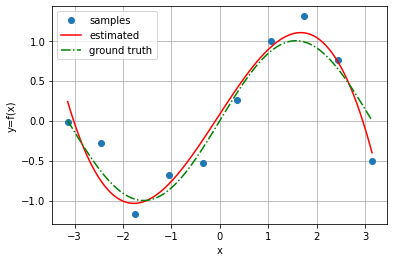

In [34]:
import numpy
import pylab

# generate samples
xn = numpy.linspace(-numpy.pi, numpy.pi, num=10)
en = numpy.random.randn(xn.size) * 0.2  # white Gaussian noise
yn = numpy.sin(xn) + en
print('xn=')
print(xn)
print('yn=')
print(yn)

# make a system matrix (use up to the cubic term)
X = numpy.vstack((
    numpy.ones(xn.size), 
    xn, 
    xn**2,
    xn**3,
    )).transpose()
print('X=')
print(X)

# least square solution
XtX = numpy.matmul(X.transpose(), X)
invXtX = numpy.linalg.inv(XtX)
Xty = numpy.matmul(X.transpose(), yn)
w_hat = numpy.matmul(invXtX, Xty)
print('w_hat=')
print(w_hat)

# estimated curve & ground truth
x = numpy.linspace(-numpy.pi, numpy.pi, 100)
y_hat = w_hat[0] + w_hat[1] * x + w_hat[2] * x**2 + w_hat[3] * x**3 
y_gt = numpy.sin(x)

# plot the result
pylab.plot(xn, yn, 'o', label='samples')
pylab.plot(x, y_hat, '-r', label='estimated')
pylab.plot(x, y_gt, '-.g', label='ground truth')
pylab.xlabel('x')
pylab.ylabel('y=f(x)')
pylab.legend()
pylab.grid()
pylab.show()
